# Part 1 (40 Marks)

## PROBLEM STATEMENT
The following questions need to be answered for the dataset in the below link

http://files.grouplens.org/datasets/movielens/ml-1m.zip

1. Find out the total number of movies, total number of ratings and total number of users_who_rated for movies (9 marks)

2. Visualize the distribution of overall rating by users (3 marks)

3. Visualize the users rating distribution (3 marks)

4. Genre distribution as a pie chart (10 marks)

5. Top ranked movies consider only those movies which have received at-least 100 ratings (15 marks)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Reading Rating file
col_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_csv("Datasets//ml-1m//ratings.dat", sep="::", names=col_names, header=None, engine='python')

In [ ]:
ratings.head()

In [4]:
#Reading users file
col_names = ['UserID', 'Gender','Age', 'Occupation', 'Zip-code']
users = pd.read_csv("Datasets//ml-1m//users.dat", sep="::", names=col_names, header=None, engine='python')

In [ ]:
users.head()

In [5]:
#reading movies file
col_names = ['MovieID', 'Title', 'Genres']
movies = pd.read_csv("Datasets//ml-1m//movies.dat", names = col_names, header=None, sep="::", engine='python')

In [ ]:
movies.head()

**Q1: Find out the total number of movies, total number of ratings and total number of users_who_rated for movies**

In [ ]:
print("Number of movies rated = " ,movies['MovieID'].nunique())
print("Number of ratings = ", len(ratings.index))
print("Number of users rated = ", ratings['UserID'].nunique())

**Q2: Visualize the distribution of overall rating by users.**

In [ ]:
ratings['UserID'].value_counts()

In [ ]:
plt.figure(figsize=(35,10))
plt.hist(ratings['UserID'], bins=1000)
plt.show()

**Q3: Visualize the users rating distribution**

In [ ]:
ratings['Rating'].value_counts()

In [ ]:
plt.hist(ratings['Rating'])
plt.title('Rating distribution as a histogram')
plt.ylabel('Number of ratings')
plt.xlabel('Rating')
plt.show()

**Q4: Show Genre distribution as a pie chart**  
ALthough there can be mutiple genre assigned to one movie. We'll assume that first Genre is the primary. Pie chart can be created based on that first Genre

In [ ]:
df_genre = movies['Genres'].str.split('|', expand  = True)
df_genre.columns = ["Genre1", "Genre2", "Genre3", "Genre4", "Genre5", "Genre6"]

In [ ]:
df = pd.DataFrame(df_genre['Genre1'].value_counts()).reset_index()
df.columns = ['Genre', 'Count']

plt.pie(df['Count'], labels=df['Genre'])

# View the plot
plt.tight_layout()
plt.show()

**Q5: List out top 15 ranked movies (consider only those movies which are rated by atleast 100 users)**

In [11]:
#Store the number of users who rated for a movie 
df1 = pd.DataFrame(ratings.groupby('MovieID')['UserID'].count())
df1.columns = ['Count']
#Store total sum of rating for a movie
df2 = pd.DataFrame(ratings.groupby('MovieID')['Rating'].sum())

#get the index of movies which have received at-least 100 ratings
index_movies = df1['Count'] >= 100

#join the two dataframe to create one dataframe. This will ease our calculation
df3 = df1[index_movies].join(df2[index_movies])

#calculate Average rating for each movie
df3['Avg_rating'] = df3['Rating']/df3['Count']

# Sort average rating in descending order and join with movies to get Title
df3.sort_values('Avg_rating', ascending=False).join(movies[['MovieID', 'Title']].set_index('MovieID')).reset_index().head(15)

,MovieID,Count,Rating,Avg_rating,Title
0,2019,628,2864,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
1,318,2227,10143,4.554558,"Shawshank Redemption, The (1994)"
2,858,2223,10059,4.524966,"Godfather, The (1972)"
3,745,657,2970,4.520548,"Close Shave, A (1995)"
4,50,1783,8054,4.517106,"Usual Suspects, The (1995)"
5,527,2304,10392,4.510417,Schindler's List (1993)
6,1148,882,3976,4.507937,"Wrong Trousers, The (1993)"
7,922,470,2111,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
8,1198,2514,11257,4.477725,Raiders of the Lost Ark (1981)
9,904,1050,4700,4.476190,Rear Window (1954)


<function matplotlib.pyplot.show(*args, **kw)>

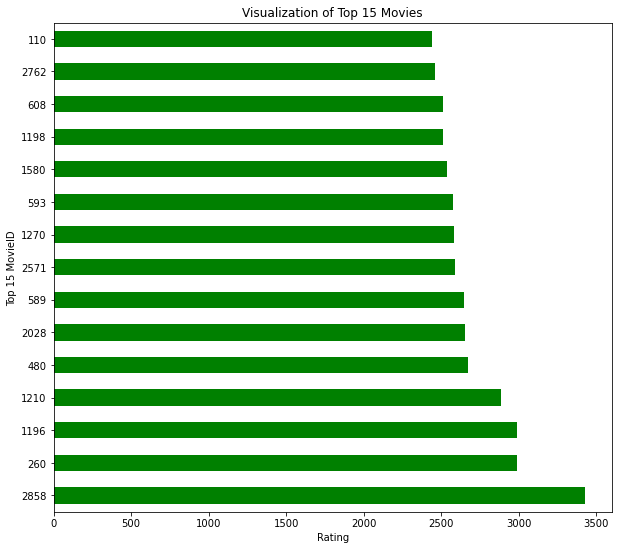

In [12]:
ratings.groupby('MovieID')['Rating'].count().sort_values(ascending = False)[:15].plot(kind ='barh', color = 'g', x = 'Rating', y = 'Number of Users', title = 'User Rating', figsize = (10,9))
plt.xlabel('Rating')
plt.ylabel('Top 15 MovieID')
plt.title('Visualization of Top 15 Movies')
plt.show